In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('Popoolation2/fst_sliding/population2.fst', sep='\t', header=None, 
                 names=["contig",
                        "window_pos",
                        "num_of_SNP",
                        "fraction_window",
                        "avg_min_cov",
                        "1:2",
                        "1:3",
                        "1:4",
                        "1:5",
                        "1:6",
                        "1:7",
                        "1:8",
                        "2:3",
                        "2:4",
                        "2:5",
                        "2:6",
                        "2:7",
                        "2:8",
                        "3:4",
                        "3:5",
                        "3:6",
                        "3:7",
                        "3:8",
                        "4:5",
                        "4:6",
                        "4:7",
                        "4:8",
                        "5:6",
                        "5:7",
                        "5:8",
                        "6:7",
                        "6:8",
                        "7:8",])

df["num_of_SNP"] = df["num_of_SNP"].replace(0, np.NaN)                                                                                       
df = df.dropna()


for col in df.columns[5:]:
    df[col] = df[col].str.split('=').str[1].astype(float)
    
    column_values = df[col]
    cutoff = np.percentile(column_values, 95)
    print(col)
    df.loc[df[col] < cutoff, col] = np.NaN
    df = df.dropna(thresh=6)

    



1:2
1:3
1:4
1:5
1:6
1:7
1:8
2:3
2:4
2:5
2:6
2:7
2:8
3:4
3:5
3:6
3:7
3:8
4:5
4:6
4:7
4:8
5:6
5:7
5:8
6:7
6:8
7:8


In [3]:
df

,contig,window_pos,num_of_SNP,fraction_window,avg_min_cov,1:2,1:3,1:4,1:5,1:6,...,4:5,4:6,4:7,4:8,5:6,5:7,5:8,6:7,6:8,7:8
22,sq0001,225000,380.0,0.920,18.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,sq0001,355000,264.0,0.948,18.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,sq0001,925000,154.0,0.866,16.6,NaN,0.321979,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,sq0001,1095000,162.0,0.753,17.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,sq0001,1105000,218.0,0.916,19.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31013,sq0866,5000,27.0,0.027,12.1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.322883,NaN,NaN,NaN,NaN,NaN,NaN,0.403784,NaN
31067,sq0921,5000,2.0,0.003,10.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31077,sq0931,5000,16.0,0.018,11.3,NaN,0.440982,0.358815,NaN,NaN,...,NaN,0.512277,NaN,NaN,NaN,NaN,NaN,NaN,0.595710,NaN
31264,sq1140,5000,2.0,0.002,10.3,0.387256,0.555556,0.367199,0.56488,0.322109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
col_2_drop_nw = ['1:2', '1:3', '1:4', '2:3', 
                 '2:4', '3:4', '5:6', '5:7',
                 '5:8', '6:7', '6:8', '7:8']


col_2_drop_nn = ['1:5', '1:6', '1:7', '1:8', 
                 '2:5', '2:6', '2:7', '2:8', 
                 '3:5', '3:6', '3:7', '3:8', 
                 '4:5', '4:6', '4:7', '4:8',
                 '5:6', '5:7', '5:8', '6:7',
                 '6:8','7:8']


col_2_drop_ww = ['1:2', '1:3', '1:4', '1:5', 
                 '1:6', '1:7', '1:8', '2:3', 
                 '2:4', '2:5', '2:6', '2:7', 
                 '2:8', '3:4', '3:5', '3:6', 
                 '3:7', '3:8', '4:5', '4:6',
                 '4:7', '4:8',]







df_nw = df.drop(col_2_drop_nw, axis=1)
df_nw = df_nw.dropna(thresh=6)

df_nn = df.drop(col_2_drop_nn, axis=1)
df_nn = df_nn.dropna(thresh=6)

df_ww = df.drop(col_2_drop_ww, axis=1)
df_ww = df_ww.dropna(thresh=6)

In [5]:
df_nw

,contig,window_pos,num_of_SNP,fraction_window,avg_min_cov,1:5,1:6,1:7,1:8,2:5,...,2:7,2:8,3:5,3:6,3:7,3:8,4:5,4:6,4:7,4:8
22,sq0001,225000,380.0,0.920,18.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,sq0001,355000,264.0,0.948,18.6,NaN,NaN,NaN,NaN,NaN,...,NaN,0.357456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,sq0001,1095000,162.0,0.753,17.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,sq0001,1105000,218.0,0.916,19.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,sq0001,1125000,113.0,0.602,14.8,NaN,NaN,NaN,NaN,NaN,...,NaN,0.331845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31002,sq0855,5000,46.0,0.061,12.4,0.43052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31013,sq0866,5000,27.0,0.027,12.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.370941,NaN,NaN,NaN,0.322883,NaN,NaN
31077,sq0931,5000,16.0,0.018,11.3,NaN,NaN,NaN,0.445193,NaN,...,NaN,NaN,NaN,0.593592,NaN,NaN,NaN,0.512277,NaN,NaN
31264,sq1140,5000,2.0,0.002,10.3,0.56488,0.322109,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


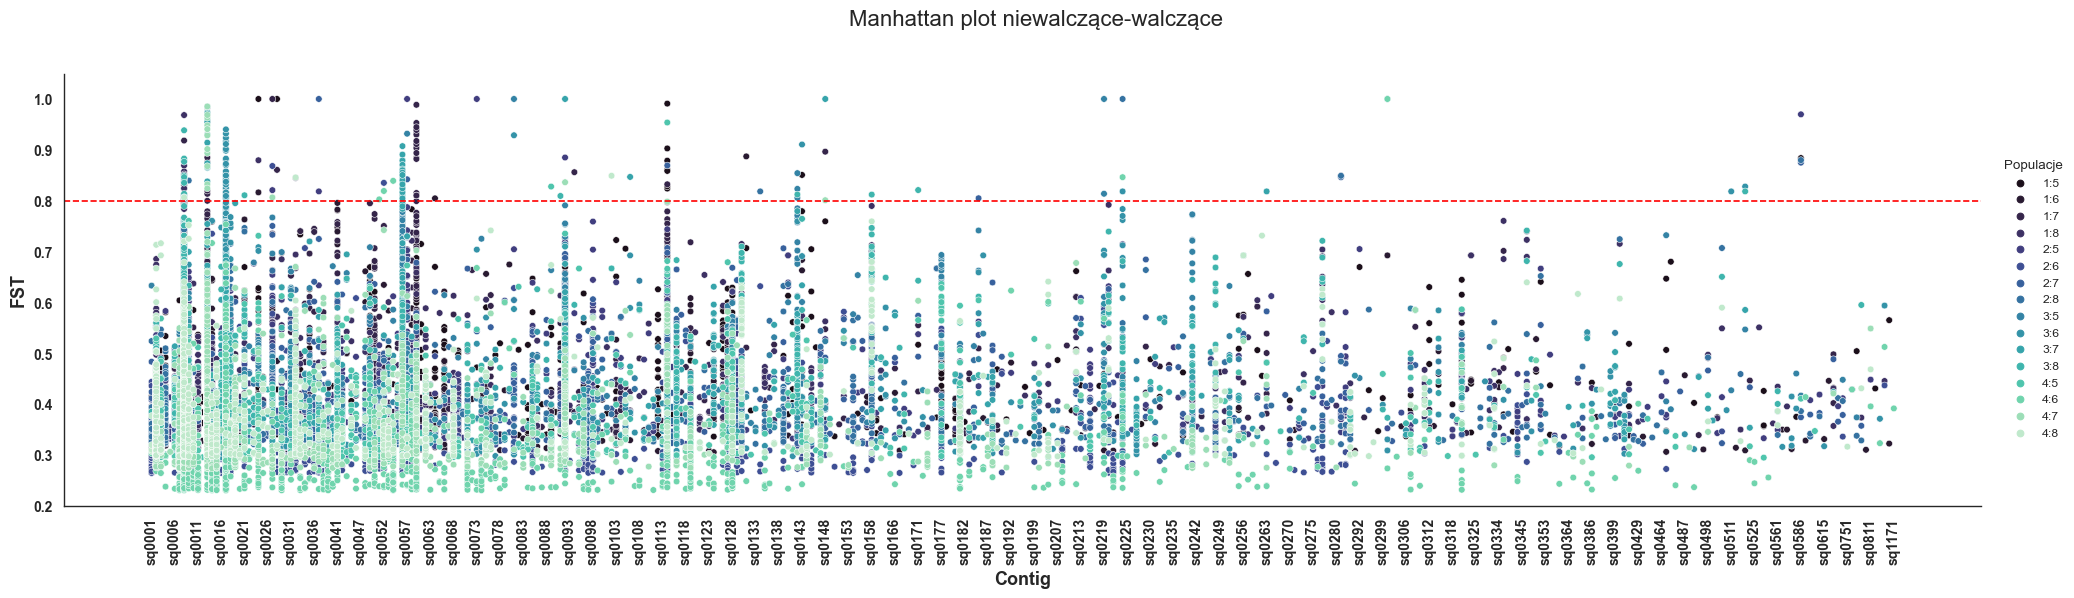

In [6]:
# Tworzenie przykładowego DataFrame
df = pd.DataFrame(df_nw)

# Tworzenie DataFrame z przekształconymi danymi
melted_df = df.melt(id_vars=['contig'], value_vars=df.columns[5:], var_name='Populacje', value_name='FST')

# Tworzenie wykresu z wykorzystaniem sns.relplot
sns.set_theme(style="white")
sns.set_context("paper")
plot = sns.relplot(data=melted_df, x='contig', y='FST', kind='scatter', hue='Populacje', palette='mako', aspect=4)
#plot.set(xticklabels=[])

xticks = df['contig'].unique()[::5]  # Wybierz co piąty tick
plt.xticks(xticks)  # Ustaw ticki na wybranych pozycjach
plot.set_xticklabels(xticks, rotation=90, weight='bold', fontsize=10)  # Ustaw etykiety dla wybranych ticków
    
plot.set_yticklabels(weight='bold', fontsize=10)
plot.ax.axhline(y=0.8, color='red', linestyle='--')
plot.fig.suptitle('Manhattan plot niewalczące-walczące', fontsize=16, y=1.1)
plot.set_xlabels('Contig', weight='bold', fontsize=13)
plot.set_ylabels('FST', weight='bold', fontsize=13)
plot.set(ylim=(0.2, 1.05))

plt.show()
plot.savefig('nw.png', dpi=500)

In [7]:
# Usunięcie wartości większych niż "sq0150" w kolumnie "contig"
df_nw2 = df_nw[df_nw['contig'] <= 'sq0114']

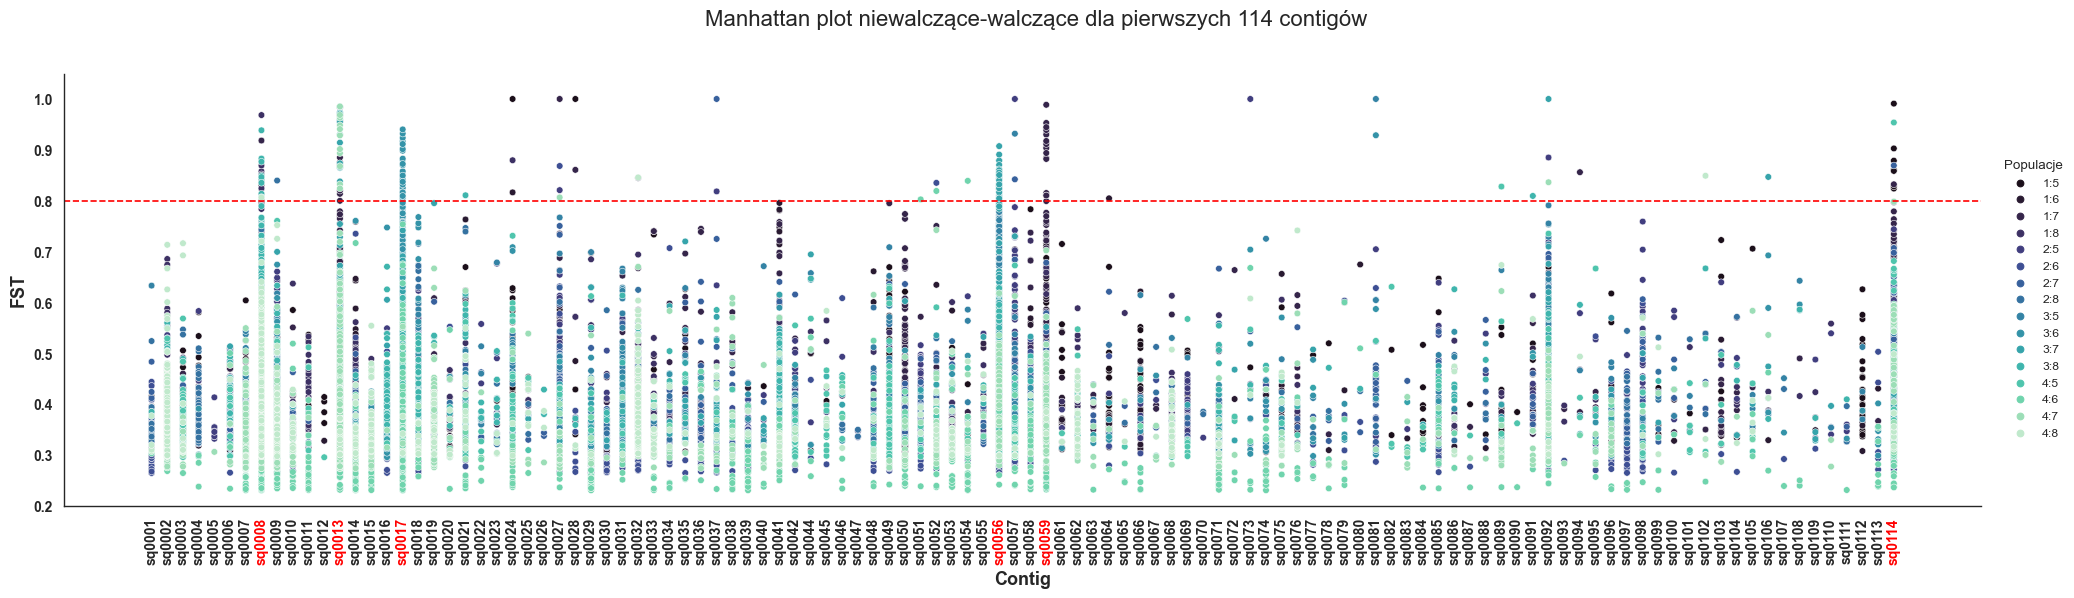

In [8]:
# Tworzenie przykładowego DataFrame
df = pd.DataFrame(df_nw2)

# Tworzenie DataFrame z przekształconymi danymi
melted_df = df.melt(id_vars=['contig'], value_vars=df.columns[5:], var_name='Populacje', value_name='FST')

# Tworzenie wykresu z wykorzystaniem sns.relplot
sns.set_theme(style="white")
sns.set_context("paper")
plot = sns.relplot(data=melted_df, x='contig', y='FST', kind='scatter', hue='Populacje', palette='mako', aspect=4)
#plot.set(xticklabels=[])
plot.set_xticklabels(rotation=90, weight='bold', fontsize=10)
plot.set_yticklabels(weight='bold', fontsize=10)

selected_contigs = ['sq0008', 'sq0013', 'sq0017', 'sq0056', 'sq0059', 'sq0114']
for label in plot.ax.get_xticklabels():
    if label.get_text() in selected_contigs:
        label.set_color('red')

plot.ax.axhline(y=0.8, color='red', linestyle='--')
plot.fig.suptitle('Manhattan plot niewalczące-walczące dla pierwszych 114 contigów', fontsize=16, y=1.1)
plot.set_xlabels('Contig', weight='bold', fontsize=13)
plot.set_ylabels('FST', weight='bold', fontsize=13)
plot.set(ylim=(0.2, 1.05))

plt.show()
plot.savefig('nw_crop.png', dpi=500)

In [9]:
df_nw2

,contig,window_pos,num_of_SNP,fraction_window,avg_min_cov,1:5,1:6,1:7,1:8,2:5,...,2:7,2:8,3:5,3:6,3:7,3:8,4:5,4:6,4:7,4:8
22,sq0001,225000,380.0,0.920,18.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,sq0001,355000,264.0,0.948,18.6,NaN,NaN,NaN,NaN,NaN,...,NaN,0.357456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,sq0001,1095000,162.0,0.753,17.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,sq0001,1105000,218.0,0.916,19.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,sq0001,1125000,113.0,0.602,14.8,NaN,NaN,NaN,NaN,NaN,...,NaN,0.331845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22856,sq0114,535000,273.0,0.324,16.5,NaN,NaN,NaN,NaN,NaN,...,0.619049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22857,sq0114,545000,517.0,0.416,16.0,NaN,NaN,NaN,NaN,NaN,...,0.487628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22858,sq0114,555000,594.0,0.562,17.7,NaN,NaN,NaN,NaN,NaN,...,0.391885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22859,sq0114,565000,347.0,0.413,18.3,NaN,NaN,NaN,NaN,0.335235,...,0.343149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


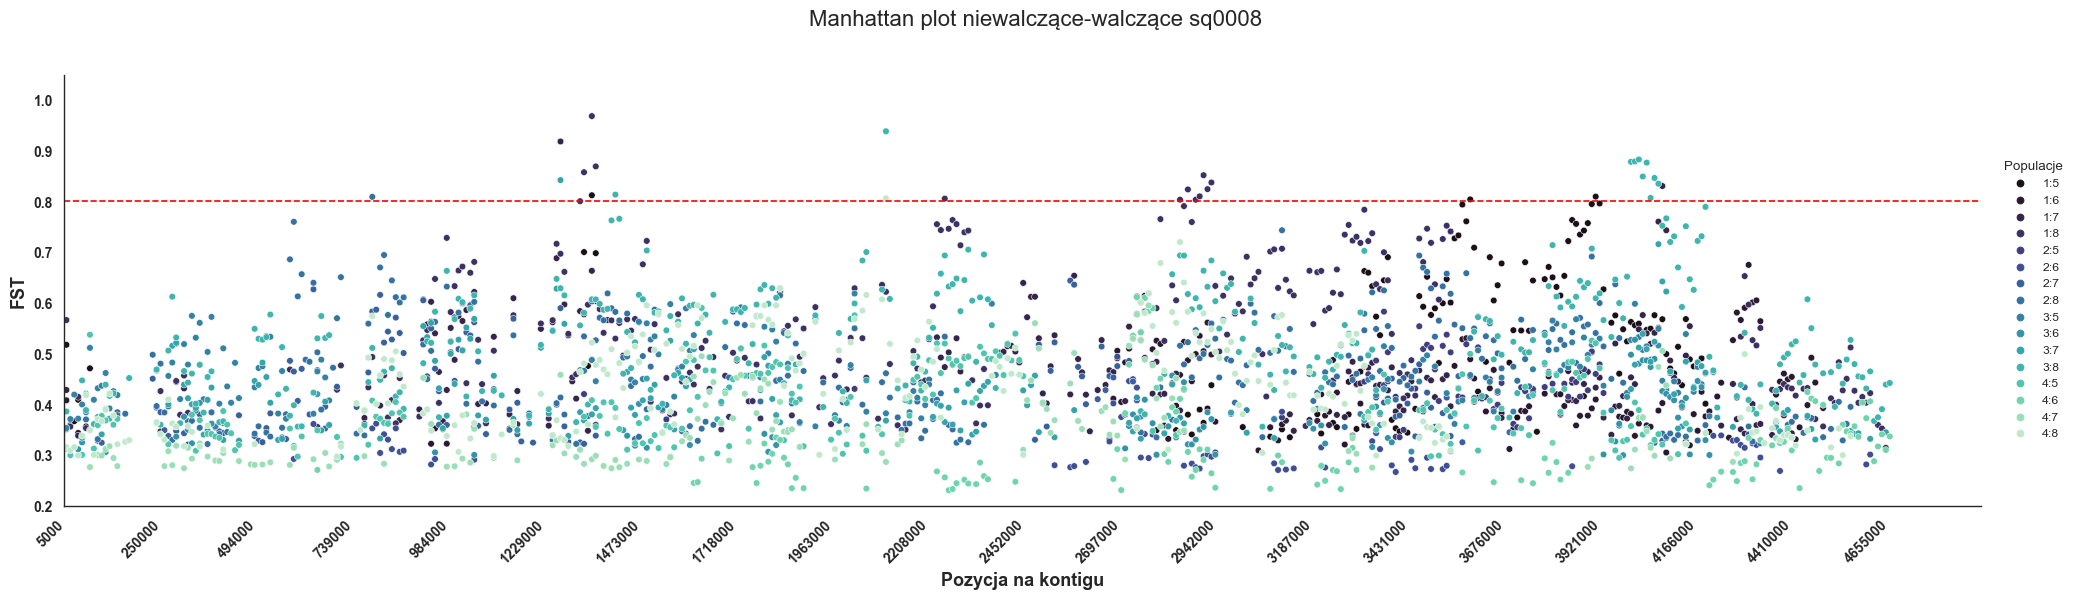

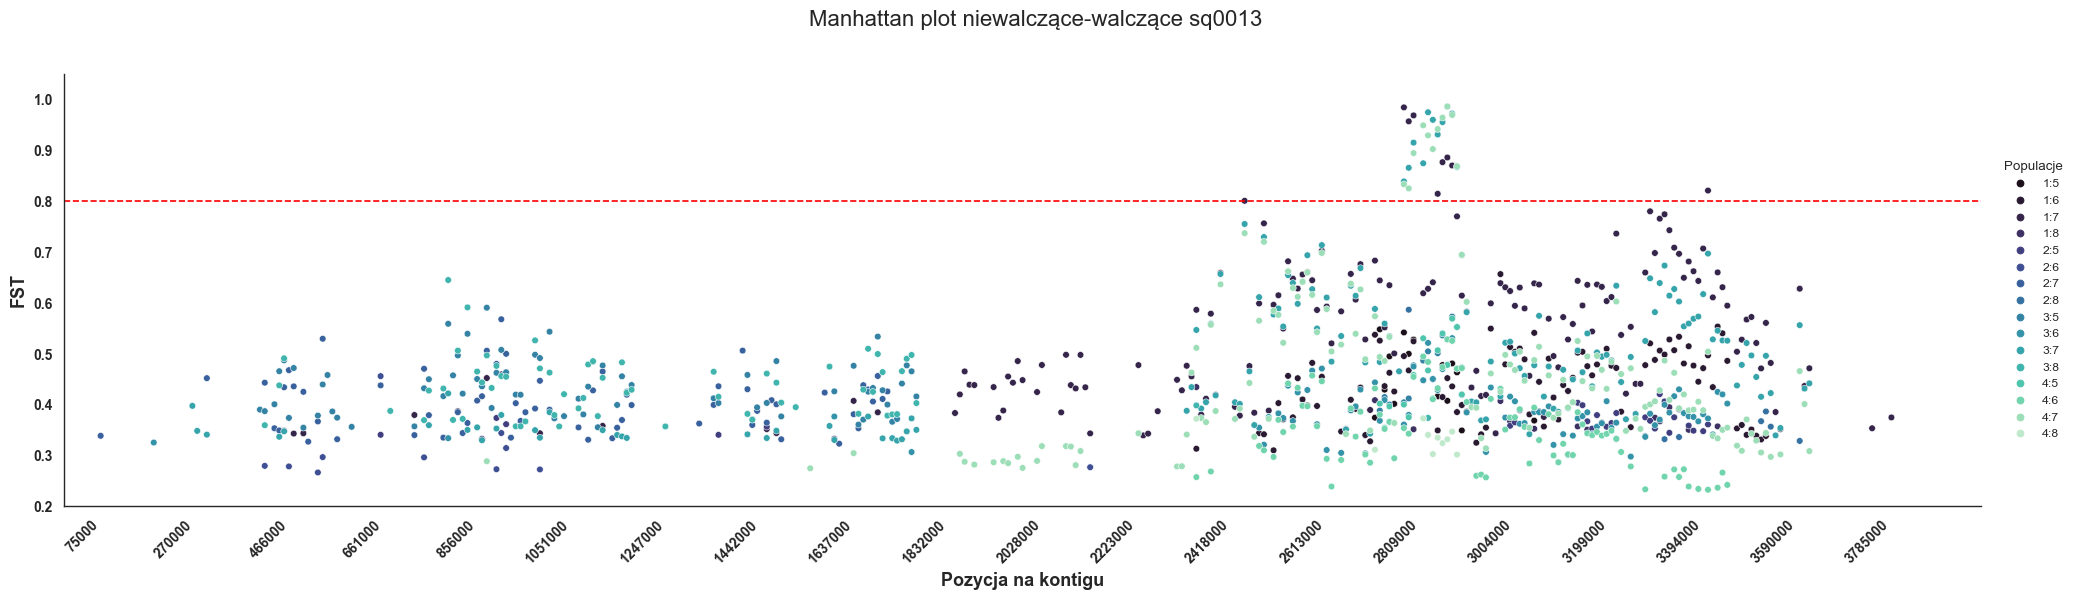

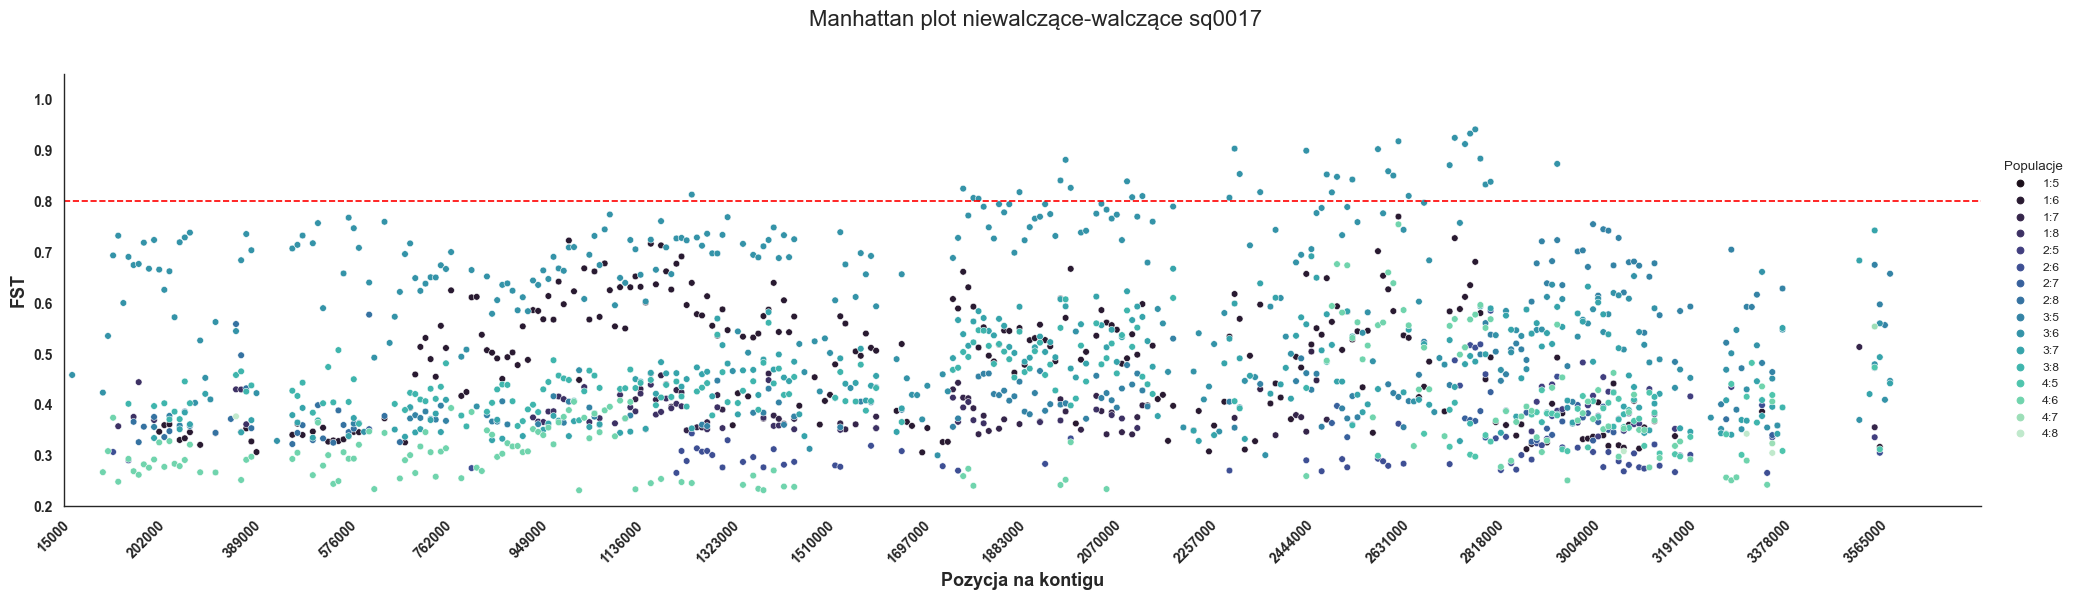

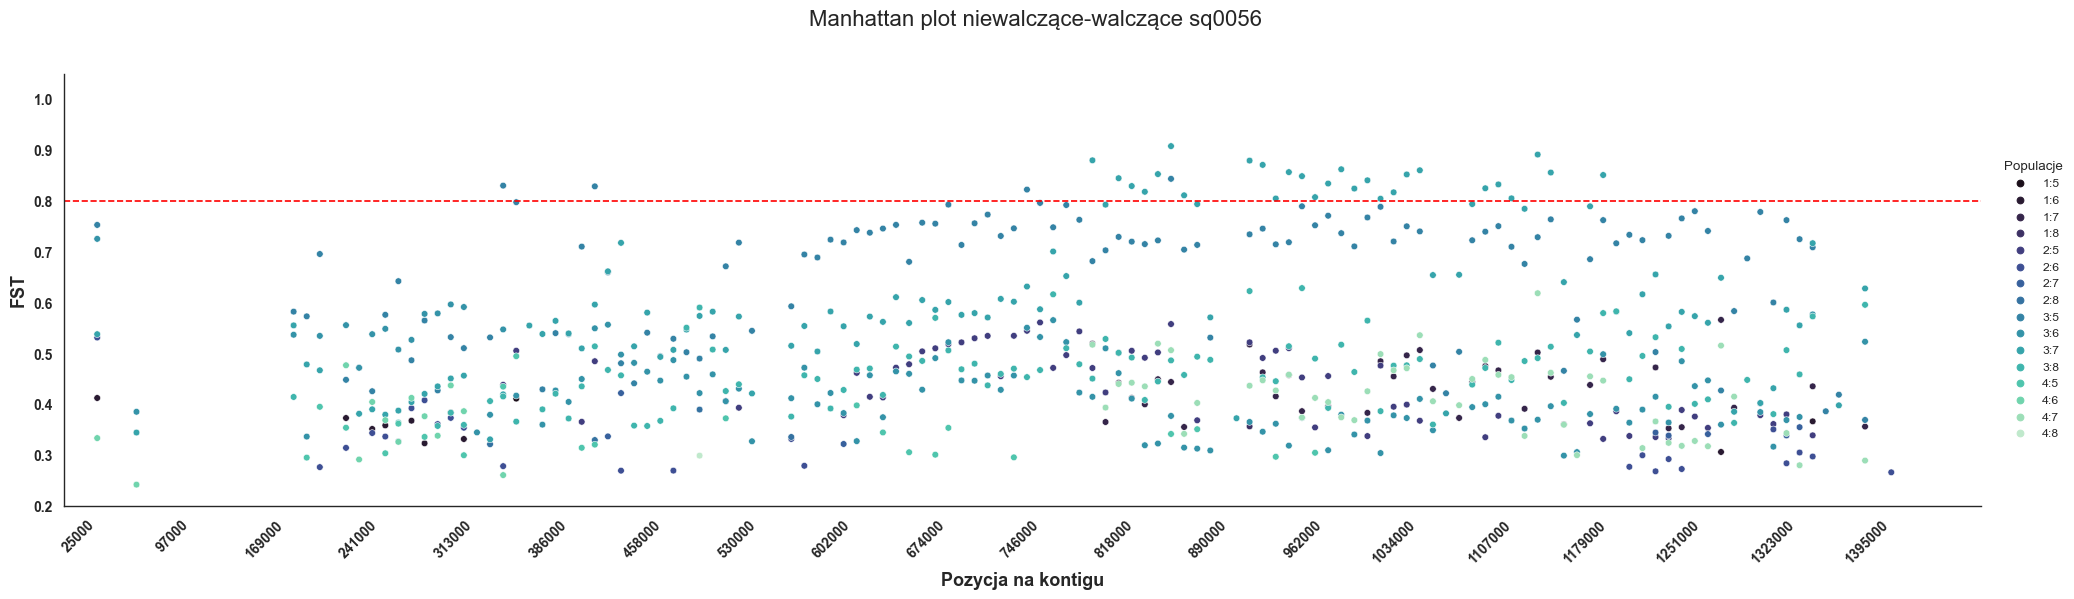

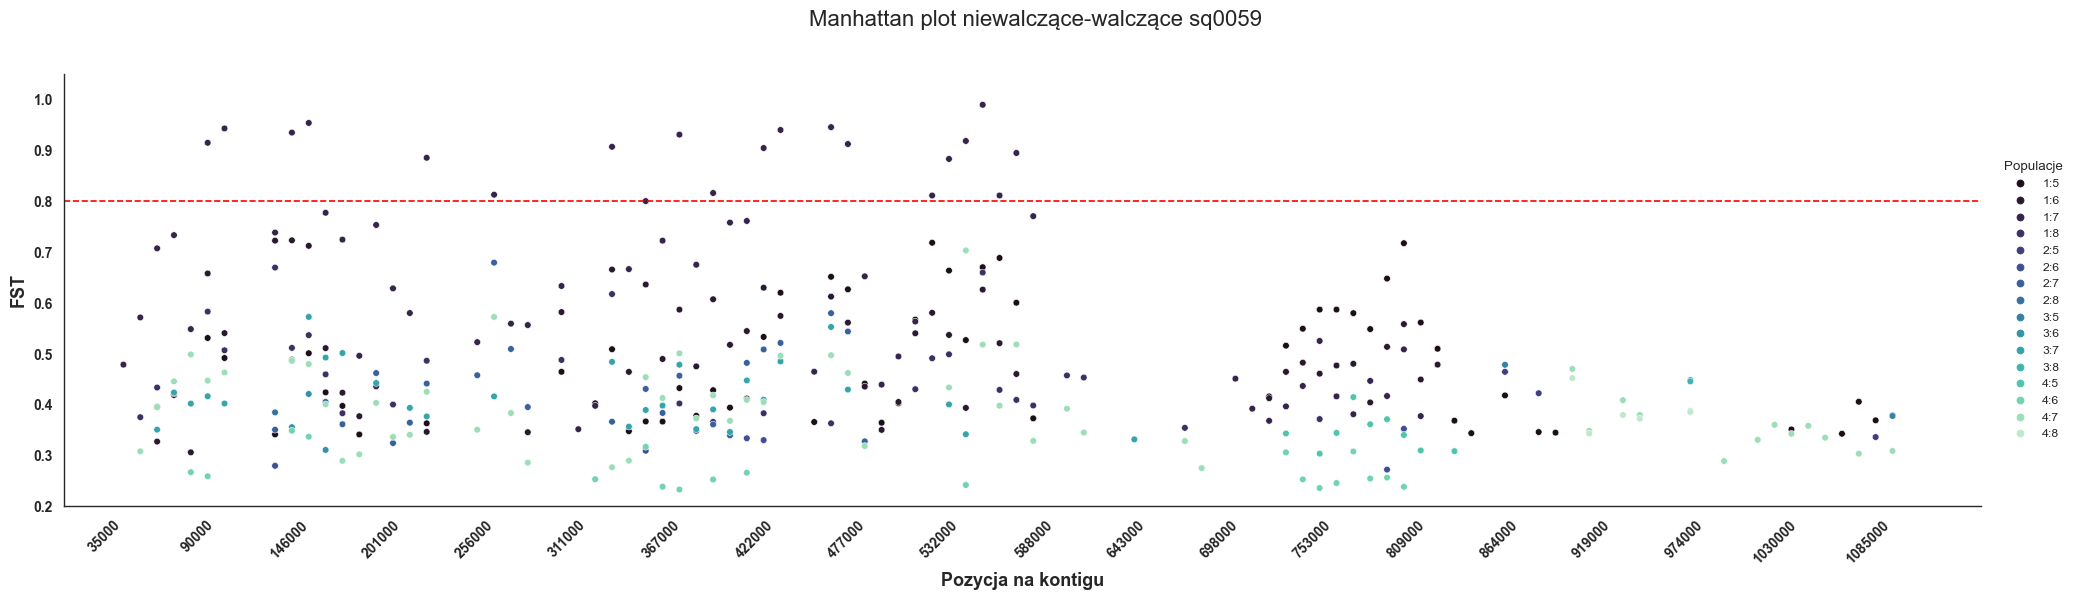

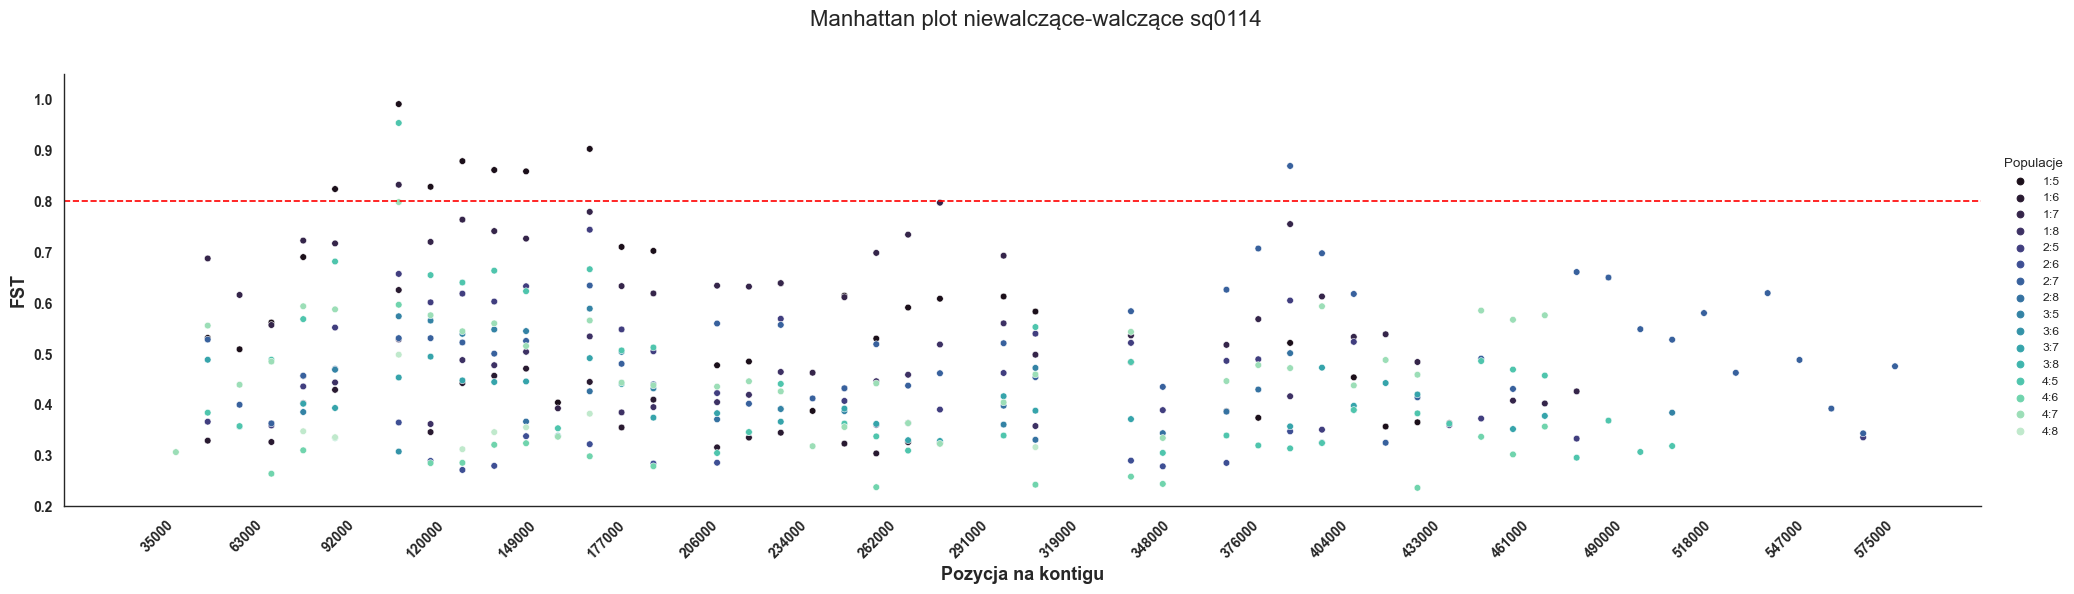

In [10]:
#sq0008, sq0013, sq0017, sq0056, sq0059, sq0114, sq0223,sq0586


#df_nw

df_nw_sq0008 = df_nw.query("contig == 'sq0008' ")
df_nw_sq0013 = df_nw.query("contig == 'sq0013' ")
df_nw_sq0017 = df_nw.query("contig == 'sq0017' ")
df_nw_sq0056 = df_nw.query("contig == 'sq0056' ")
df_nw_sq0059 = df_nw.query("contig == 'sq0059' ")
df_nw_sq0114 = df_nw.query("contig == 'sq0114' ")

def peak_plot(peak_df, peak):

    # Tworzenie przykładowego DataFrame
    df = pd.DataFrame(peak_df)

    # Tworzenie DataFrame z przekształconymi danymi
    melted_df = df.melt(id_vars=['window_pos'], value_vars=df.columns[5:], var_name='Populacje', value_name='FST')

    # Tworzenie wykresu z wykorzystaniem sns.relplot
    sns.set_theme(style="white")
    sns.set_context("paper")
    plot = sns.relplot(data=melted_df, x='window_pos', y='FST', kind='scatter', hue='Populacje', palette='mako', aspect=4)
    #plot.set(xticklabels=[])
    
    # xticks = df['window_pos'].unique()[::10]  # Wybierz co piąty tick
    # plt.xticks(xticks)  # Ustaw ticki na wybranych pozycjach
    # plot.set_xticklabels(xticks, rotation=45, ha='right', fontsize=10)  # Ustaw etykiety dla wybranych ticków
    
    tick_locs = np.linspace(df['window_pos'].min(), df['window_pos'].max(), 20) # n_ticks to ilosc labeli na osi x
    tick_locs = np.round(tick_locs / 1000) * 1000
    plt.xticks(tick_locs)
    plot.set_xticklabels(tick_locs.astype(int), rotation=45, ha='right') 
    
    plot.set_xticklabels(weight='bold', fontsize=10)
    plot.set_yticklabels(weight='bold', fontsize=10)
    plot.ax.axhline(y=0.8, color='red', linestyle='--')
    plot.fig.suptitle(f'Manhattan plot niewalczące-walczące {peak}', fontsize=16, y=1.1)
    plot.set_xlabels('Pozycja na kontigu', weight='bold', fontsize=13)
    plot.set_ylabels('FST', weight='bold', fontsize=13)
    plot.set(ylim=(0.2, 1.05))
    plot.set(xlim=(0.0, None))

    plt.show()
    plot.savefig(f'nw_{peak}.png', dpi=500)

peak_plot(df_nw_sq0008, 'sq0008')
peak_plot(df_nw_sq0013, 'sq0013')
peak_plot(df_nw_sq0017, 'sq0017')
peak_plot(df_nw_sq0056, 'sq0056')
peak_plot(df_nw_sq0059, 'sq0059')
peak_plot(df_nw_sq0114, 'sq0114')